# 一起来打怪之 Credit Scoring 练习

---
## 作业说明

- 答题步骤：
    - 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
    - 请养成代码注释的好习惯

- 解题思路：
    - 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
    - 解题思路**仅供参考**，鼓励原创解题方法
    - 为督促同学们自己思考，解题思路内容设置为**白色**，必要时请从冒号后拖动鼠标查看

- 所用数据
    - 请注意导入数据库后先**查看和了解数据的基本性质**，后面的问题不再一一提醒

## machine learning for credit scoring


Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years. [Dataset](https://www.kaggle.com/c/GiveMeSomeCredit)

Attribute Information:

|Variable Name	|	Description	|	Type|
|----|----|----|
|SeriousDlqin2yrs	|	Person experienced 90 days past due delinquency or worse 	|	Y/N|
|RevolvingUtilizationOfUnsecuredLines	|	Total balance on credit divided by the sum of credit limits	|	percentage|
|age	|	Age of borrower in years	|	integer|
|NumberOfTime30-59DaysPastDueNotWorse	|	Number of times borrower has been 30-59 days past due |	integer|
|DebtRatio	|	Monthly debt payments	|	percentage|
|MonthlyIncome	|	Monthly income	|	real|
|NumberOfOpenCreditLinesAndLoans	|	Number of Open loans |	integer|
|NumberOfTimes90DaysLate	|	Number of times borrower has been 90 days or more past due.	|	integer|
|NumberRealEstateLoansOrLines	|	Number of mortgage and real estate loans	|	integer|
|NumberOfTime60-89DaysPastDueNotWorse	|	Number of times borrower has been 60-89 days past due |integer|
|NumberOfDependents	|	Number of dependents in family	|	integer|


----------
## Read the data into Pandas 

In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [92]:
data.shape

(112915, 11)

------------
## Drop na

In [93]:
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [94]:
data.dropna(inplace=True)
data.shape

(108648, 11)

---------
## Create X and y

In [98]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
y = np.array(data['SeriousDlqin2yrs'])
X = np.array(data.drop('SeriousDlqin2yrs', axis=1))
y

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

    ---
## 练习1：把数据切分成训练集和测试集
- 提示：<span style='color:white'>from sklearn.model_selection import train_test_split('Gender') </span>

In [99]:
## your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

# 查看数据的维度
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# y_train

((76053, 10), (32595, 10), (76053,), (32595,))

In [126]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as np

# 创建 MinMaxScaler 对象
min_max_scaler = MinMaxScaler()
# 在训练集上拟合和转换数据
X_train_minmax = min_max_scaler.fit_transform(X_train)
# 在测试集上应用相同的缩放
X_test_minmax = min_max_scaler.transform(X_test)

# sc = StandardScaler()  # 对数据的每一列做了一个归一化
# sc.fit(X_train_minmax)
# sc.mean_
# sc.scale_

# # 定义训练集和检测集的标准化
# X_train_std = sc.transform(X_train_minmax)
# X_test_std = sc.transform(X_test_minmax)

# # Check
# np.mean(X_train_std, axis=0), np.std(X_train_std, axis=0)
# # np.mean(X_test_std, axis=0), np.std(X_test_std, axis=0)

----
## 练习2：使用logistic regression/决策树/SVM/KNN...等sklearn分类算法进行分类
尝试查sklearn API了解模型参数含义，调整不同的参数

### 感知器

m: num of samples

n: num of features

k: num of classes

$X_{mn} * W_{nk} = Y_{mk}$

In [101]:
from sklearn.linear_model import Perceptron

# 初始化一个感知器
ppn = Perceptron(max_iter=10, eta0=0.1, random_state=0)
X_train_std.shape


(76053, 10)

In [102]:
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=10)

In [103]:
# Weights assigned to the features. (n_classes, n_features)
ppn.coef_ 
# 总共有10个feature，对应的y只有1个label
# Constants in decision function.  (n_classes,)
ppn.intercept_ # 偏置项

y_pred = ppn.predict(X_test_std)
y_pred
y_test
y_pred == y_test

array([False,  True,  True, ...,  True,  True,  True])

In [104]:
print('Misclassified samples: %d' % (y_test != y_pred).sum())

from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 4956
Accuracy: 0.85


当迭代10次，Accuracy为0.85，Misclassified samples: 4956

当迭代20次，Accuracy为0.85，Misclassified samples: 4956

当迭代100次，Accuracy为0.85

应该很快就收敛了

In [105]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=np.array([cmap(idx)]),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    alpha=0.15,
                    linewidths=2,
                    marker='^',
                    edgecolors='black',
                    facecolors='none',
                    s=55, label='test set')

In [106]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as np

# # 初始化一个感知器，只进行两个feature的分类
# ppn = Perceptron(max_iter=10, eta0=0.1, random_state=0)
# ppn.fit(X_train_std[:,0:2], y_train[:])

# y_pred = ppn.predict(X_test_std[:,0:2])

# 创建 MinMaxScaler 对象
min_max_scaler = MinMaxScaler()
# 在训练集上拟合和转换数据
X_train_minmax = min_max_scaler.fit_transform(X_train)
# 在测试集上应用相同的缩放
X_test_minmax = min_max_scaler.transform(X_test)

# 初始化一个感知器，只进行feature的分类
ppn = Perceptron(max_iter=30, eta0=0.1, random_state=0)
ppn.fit(X_train_minmax, y_train)

y_pred = ppn.predict(X_test_minmax)

print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 2884
Accuracy: 0.91


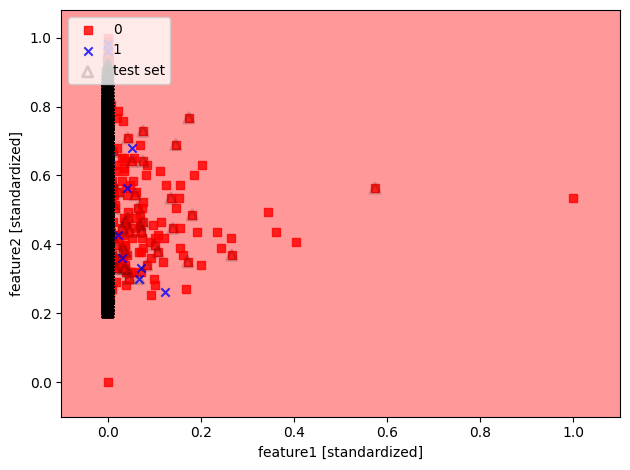

In [110]:
%matplotlib inline
X_combined_std = np.vstack((X_train_minmax, X_test_minmax))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std[:,0:2], y=y_combined,
                      classifier=ppn, test_idx=range(X_train_std.shape[0]-1, X.shape[0]))
plt.xlabel('feature1 [standardized]')
plt.ylabel('feature2 [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### Logistic regression
- 提示：<span style='color:white'>from sklearn import linear_model('Gender') </span>

- Softmax function:
$P\left(y_i\right)=\frac{\exp \left(y_i\right)}{\sum_{j=1}^n \exp \left(y_j\right)}$
    - When n=1 => sigmoid function

In [108]:
## your code here
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, max_iter=250, random_state=0)
lr.fit(X_train_minmax, y_train)

LogisticRegression(C=1000.0, max_iter=250, random_state=0)

In [111]:
# 采用lr.predict_proba
# 结果为：array([[0.96871123, 0.03128877]])
lr.predict_proba(X_test_minmax[0, :].reshape(1, -1))

# lr.coef_
# y_test[0]
X_test_minmax[0,:]
# 结果为：
#   array([2.53818062e-06, 5.92233010e-01, 0.00000000e+00, 7.90367612e-01,
    #    1.49530586e-03, 4.21052632e-01, 0.00000000e+00, 1.53846154e-01,
    #    0.00000000e+00, 0.00000000e+00])
lr.coef_.T
# 结果为：
#   array([[ -3.91715749],
    #    [ -2.60217402],
    #    [ 47.14416121],
    #    [  1.41076795],
    #    [-18.68373464],
    #    [ -1.03644689],
    #    [ 46.1767893 ],
    #    [ -4.82975709],
    #    [-89.4516986 ],
    #    [  2.011168  ]])
lr.intercept_
# 结果为：
# array([-1.79925325])

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)
# check
softmax((X_test_minmax[0, :] @ lr.coef_.T + lr.intercept_))
# 结果为：
# array([1.])

# 在这里为什么得到的结果与lr.predict_proba得到的结果不一样？
# 这里的y应该是有两个类别0和1，为什么lr.intercept_只有一个值

array([[0.96871123, 0.03128877]])

In [115]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)
# check
softmax((X_test_minmax[0, :] @ lr.coef_.T + lr.intercept_))

array([1.])

c:\Users\Ultimator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Ultimator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

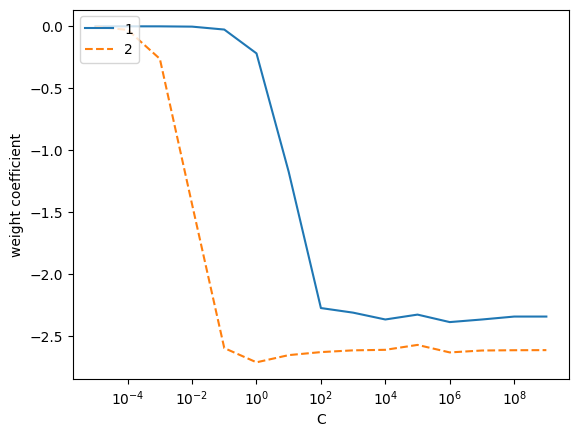

In [55]:
weights, params = [], []
for c in np.arange(-5, 10):
    lr = LogisticRegression(C=10**(c*1.0), random_state=0)
    lr.fit(X_train_minmax, y_train)
    weights.append(lr.coef_[0]) # for a target class
    params.append(10**(c*1.0))
weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='1')
plt.plot(params, weights[:, 1], linestyle='--',
         label='2')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

# 在这段代码中，我们在一个范围内遍历了不同的C值（通过10**(c*1.0)计算得到），对每个C值，我们都训练了一个逻辑回归模型，并保存了模型的权重和对应的C值。
# 然后，我们将模型对于两个特征（'petal length'和'petal width'）的权重随C值的变化绘制在同一张图上。

### Decision Tree
- 提示：<span style='color:white'>from sklearn.tree import DecisionTreeClassifier('Gender') </span>

In [130]:
## your code here
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test_minmax)
print('DecisionTreeClassifier:')
print('Misclassified samples: %d' % (y_test != y_pred_tree).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tree))


DecisionTreeClassifier:
Misclassified samples: 2171
Accuracy: 0.93


### Random Forest
- 提示：<span style='color:white'>from sklearn.ensemble import RandomForestClassifier('Gender') </span>

In [132]:
## your code here
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy', 
                                n_estimators=10, # The number of trees in the forest.
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test_minmax)
print('RandomForestClassifier:')
print('Misclassified samples: %d' % (y_test != y_pred_forest).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_forest))

RandomForestClassifier:
Misclassified samples: 2169
Accuracy: 0.93


### SVM
- 提示：<span style='color:white'>from sklearn.svm import SVC('Gender') </span>

In [125]:
## your code here
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_minmax, y_train)
# 如果 kernel 为 ‘rbf’，那么就使用径向基函数（RBF）核计算 kernelValue
# 这里计算每个训练样本与待计算样本之间的欧氏距离，并根据参数 sigma 计算出高斯核函数的值。
y_pred_svm = svm.predict(X_test_minmax)
print('SVM:')
print('Misclassified samples: %d' % (y_test != y_pred_svm).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_svm))

LogisticRegression:
Misclassified samples: 2169
Accuracy: 0.93


In [ ]:
## your code here
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_minmax, y_train)
# 如果 kernel 为 ‘rbf’，那么就使用径向基函数（RBF）核计算 kernelValue
# 这里计算每个训练样本与待计算样本之间的欧氏距离，并根据参数 sigma 计算出高斯核函数的值。
y_pred_svm = svm.predict(X_test_minmax)
print('LogisticRegression:')
print('Misclassified samples: %d' % (y_test != y_pred_svm).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_svm))
# print("逻辑回归模型的准确度:", y_pred_lr)

### KNN
- 提示：<span style='color:white'>from sklearn.neighbors import KNeighborsClassifier('Gender') </span>

In [137]:
## your code here
## your code here
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_minmax, y_train)
y_pred_knn = svm.predict(X_test_minmax)
print('KNeighborsClassifier:')
print('Misclassified samples: %d' % (y_test != y_pred_knn).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_knn))

KNeighborsClassifier:
Misclassified samples: 2169
Accuracy: 0.93


---

## 练习3：在测试集上进行预测，计算准确度

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

### Logistic regression
- 提示：<span style='color:white'>y_pred_LR = clf_LR.predict(x_test)('Gender') </span>

In [153]:
## your code here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(C=1000.0, max_iter=250, random_state=0)
lr.fit(X_train_minmax, y_train)
y_pred_lr = lr.predict(X_test_minmax)

print('LogisticRegression:')
print('Misclassified samples: %d' % (y_test != y_pred_lr).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_lr))
# print("逻辑回归模型的准确度:", y_pred_lr)

conf_matrix = confusion_matrix(y_test, y_pred_lr) # 计算混淆矩阵
accuracy = accuracy_score(y_test, y_pred_lr) # 计算准确度
precision = precision_score(y_test, y_pred_lr) # 计算精确度
recall = recall_score(y_test, y_pred_lr) # 计算召回率
f1 = f1_score(y_test, y_pred_lr) # 计算 F1 分数

print("混淆矩阵:")
print(conf_matrix)
print("准确度:", accuracy)
print("精确度:", precision)
print("召回率:", recall)
print("F1 分数:", f1)

LogisticRegression:
Misclassified samples: 2156
Accuracy: 0.93
混淆矩阵:
[[30350    74]
 [ 2082    89]]
准确度: 0.9338548857186685
精确度: 0.5460122699386503
召回率: 0.04099493321050207
F1 分数: 0.07626392459297343


### Decision Tree
- 提示：<span style='color:white'>y_pred_tree = tree.predict(x_test)('Gender') </span>

In [152]:
## your code here
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train_minmax, y_train)
y_pred_tree = tree.predict(X_test_minmax)
print('DecisionTreeClassifier:')
print('Misclassified samples: %d' % (y_test != y_pred_tree).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tree))

conf_matrix = confusion_matrix(y_test, y_pred_tree) # 计算混淆矩阵
accuracy = accuracy_score(y_test, y_pred_tree) # 计算准确度
precision = precision_score(y_test, y_pred_tree) # 计算精确度
recall = recall_score(y_test, y_pred_tree) # 计算召回率
f1 = f1_score(y_test, y_pred_tree) # 计算 F1 分数

print("混淆矩阵:")
print(conf_matrix)
print("准确度:", accuracy)
print("精确度:", precision)
print("召回率:", recall)
print("F1 分数:", f1)

DecisionTreeClassifier:
Misclassified samples: 2118
Accuracy: 0.94
混淆矩阵:
[[30104   320]
 [ 1798   373]]
准确度: 0.935020708697653
精确度: 0.5382395382395382
召回率: 0.17181022570244128
F1 分数: 0.2604748603351955


### Random Forest
- 提示：<span style='color:white'>y_pred_forest = forest.predict(x_test)('Gender') </span>

In [151]:
## your code here
## your code here
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy', 
                                n_estimators=10, # The number of trees in the forest.
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train_minmax, y_train)
y_pred_forest = forest.predict(X_test_minmax)
print('RandomForestClassifier:')
print('Misclassified samples: %d' % (y_test != y_pred_forest).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_forest))

conf_matrix = confusion_matrix(y_test, y_pred_forest) # 计算混淆矩阵
accuracy = accuracy_score(y_test, y_pred_forest) # 计算准确度
precision = precision_score(y_test, y_pred_forest) # 计算精确度
recall = recall_score(y_test, y_pred_forest) # 计算召回率
f1 = f1_score(y_test, y_pred_forest) # 计算 F1 分数

print("混淆矩阵:")
print(conf_matrix)
print("准确度:", accuracy)
print("精确度:", precision)
print("召回率:", recall)
print("F1 分数:", f1)

RandomForestClassifier:
Misclassified samples: 2184
Accuracy: 0.93
混淆矩阵:
[[30100   324]
 [ 1860   311]]
准确度: 0.9329958582604694
精确度: 0.48976377952755906
召回率: 0.1432519576232151
F1 分数: 0.22166785459729152


### SVM
- 提示：<span style='color:white'>y_pred_SVC = clf_svc.predict(x_test)('Gender') </span>

In [150]:
## your code here
## your code here
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_minmax, y_train)
# 如果 kernel 为 ‘rbf’，那么就使用径向基函数（RBF）核计算 kernelValue
# 这里计算每个训练样本与待计算样本之间的欧氏距离，并根据参数 sigma 计算出高斯核函数的值。
y_pred_svm = svm.predict(X_test_minmax)
print('SVM:')
print('Misclassified samples: %d' % (y_test != y_pred_svm).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_svm))

conf_matrix = confusion_matrix(y_test, y_pred_svm) # 计算混淆矩阵
accuracy = accuracy_score(y_test, y_pred_svm) # 计算准确度
precision = precision_score(y_test, y_pred_svm) # 计算精确度
recall = recall_score(y_test, y_pred_svm) # 计算召回率
f1 = f1_score(y_test, y_pred_svm) # 计算 F1 分数

print("混淆矩阵:")
print(conf_matrix)
print("准确度:", accuracy)
print("精确度:", precision)
print("召回率:", recall)
print("F1 分数:", f1)

SVM:
Misclassified samples: 2169
Accuracy: 0.93
混淆矩阵:
[[30406    18]
 [ 2151    20]]
准确度: 0.9334560515416475
精确度: 0.5263157894736842
召回率: 0.009212344541685858
F1 分数: 0.01810774105930285


### KNN
- 提示：<span style='color:white'>y_pred_KNN = neigh.predict(x_test)('Gender') </span>

In [149]:
## your code here
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_minmax, y_train)
y_pred_knn = svm.predict(X_test_minmax)
print('KNeighborsClassifier:')
print('Misclassified samples: %d' % (y_test != y_pred_knn).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_knn))

conf_matrix = confusion_matrix(y_test, y_pred_knn) # 计算混淆矩阵
accuracy = accuracy_score(y_test, y_pred_knn) # 计算准确度
precision = precision_score(y_test, y_pred_knn) # 计算精确度
recall = recall_score(y_test, y_pred_knn) # 计算召回率
f1 = f1_score(y_test, y_pred_knn) # 计算 F1 分数

print("混淆矩阵:")
print(conf_matrix)
print("准确度:", accuracy)
print("精确度:", precision)
print("召回率:", recall)
print("F1 分数:", f1)


KNeighborsClassifier:
Misclassified samples: 2169
Accuracy: 0.93
混淆矩阵:
[[30406    18]
 [ 2151    20]]
准确度: 0.9334560515416475
精确度: 0.5263157894736842
召回率: 0.009212344541685858
F1 分数: 0.01810774105930285


---
## 练习4：查看sklearn的官方说明，了解分类问题的评估标准，并对此例进行评估

**混淆矩阵（Confusion Matrix）相关学习链接**

- Blog:<br>
http://blog.csdn.net/vesper305/article/details/44927047<br>
- WiKi:<br>
http://en.wikipedia.org/wiki/Confusion_matrix<br>
- sklearn doc:<br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [138]:
# 考虑到上述的模型中决策树具有较好的性能，因此采用决策树进行混淆矩阵的分析
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train_minmax, y_train)
y_pred_tree = tree.predict(X_test_minmax)
print('DecisionTreeClassifier:')
print('Misclassified samples: %d' % (y_test != y_pred_tree).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tree))

DecisionTreeClassifier:
Misclassified samples: 2118
Accuracy: 0.94


In [139]:
## your code here
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


conf_matrix = confusion_matrix(y_test, y_pred_tree) # 计算混淆矩阵
accuracy = accuracy_score(y_test, y_pred_tree) # 计算准确度
precision = precision_score(y_test, y_pred_tree) # 计算精确度
recall = recall_score(y_test, y_pred_tree) # 计算召回率
f1 = f1_score(y_test, y_pred_tree) # 计算 F1 分数

print("混淆矩阵:")
print(conf_matrix)
print("准确度:", accuracy)
print("精确度:", precision)
print("召回率:", recall)
print("F1 分数:", f1)


混淆矩阵:
[[30104   320]
 [ 1798   373]]
准确度: 0.935020708697653
精确度: 0.5382395382395382
召回率: 0.17181022570244128
F1 分数: 0.2604748603351955


准确度（Accuracy）： 分类器正确预测的样本占总样本的比例：(TP + TN) / (TP + TN + FP + FN)。

精确度（Precision）： 正类别预测的准确性，即正类别预测中有多少是真正的正类别：TP / (TP + FP)。

召回率（Recall）： 真实的正类别中有多少被分类器成功预测为正类别：TP / (TP + FN)。

F1 分数（F1 Score）： 精确度和召回率的调和平均值，综合考虑了两者：2 * (Precision * Recall) / (Precision + Recall)。

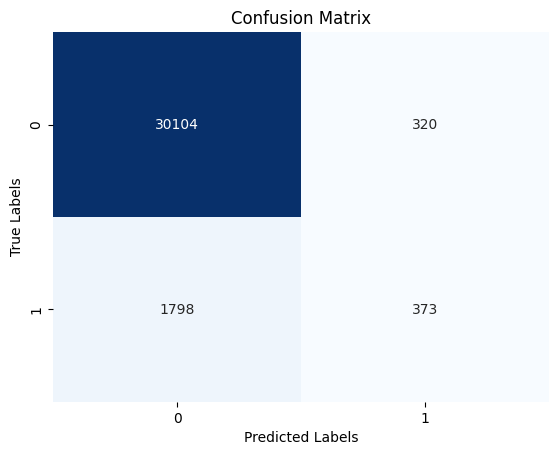

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制混淆矩阵的热图
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## 练习5：调整模型的标准

银行通常会有更严格的要求，因为fraud带来的后果通常比较严重，一般我们会调整模型的标准。<br>

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”，试试看把阈值设定为0.3，再看看这时的评估指标(主要是准确率和召回率)。

- 提示：<span style='color:white'>sklearn的很多分类模型，predict_prob可以拿到预估的概率，可以根据它和设定的阈值大小去判断最终结果(分类类别)('Gender') </span>

In [147]:
## your code here
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score

# 训练好的决策树模型
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train_minmax, y_train)

# 获取测试集上的概率预测值
y_pred_tree = tree.predict(X_test_minmax)
y_proba = tree.predict_proba(X_test_minmax)[:, 1]  # 获取正类别的概率值

conf_matrix = confusion_matrix(y_test, y_pred_tree) # 计算混淆矩阵
accuracy = accuracy_score(y_test, y_pred_tree) # 计算准确度
precision = precision_score(y_test, y_pred_tree) # 计算精确度
recall = recall_score(y_test, y_pred_tree) # 计算召回率
f1 = f1_score(y_test, y_pred_tree) # 计算 F1 分数

print("混淆矩阵:")
print(conf_matrix)
print("准确度:", accuracy)
print("精确度:", precision)
print("召回率:", recall)
print("F1 分数:", f1)


# 尝试不同的阈值
threshold = 0.1
y_pred_adjusted = (y_proba > threshold).astype(int)

# 计算调整后的准确度和召回率
conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
recall_adjusted = recall_score(y_test, y_pred_adjusted)
precision_adjusted  = precision_score(y_test, y_pred_adjusted)
print("调整后的准确度: ")
print(conf_matrix_adjusted)
print(f"调整后的准确度: {accuracy_adjusted:.4f}")
print(f"调整后的精准度: {precision_adjusted:.4f}")
print(f"调整后的召回率: {recall_adjusted:.4f}")


混淆矩阵:
[[30104   320]
 [ 1798   373]]
准确度: 0.935020708697653
精确度: 0.5382395382395382
召回率: 0.17181022570244128

调整后的准确度: 
[[25060  5364]
 [  702  1469]]
调整后的准确度: 0.8139
调整后的精准度: 0.2150
调整后的召回率: 0.6766


### 为了提高召回率，针对最近邻knn和随机森林forest进行子特征法选择

最近邻knn

In [155]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        """
        Sequential Backward Selection (SBS) algorithm.

        Parameters:
        - estimator: Machine learning model (classifier or regressor).
        - k_features: The desired number of features to select.
        - scoring: Scoring function used to evaluate the performance of the model.
                   Default is accuracy_score.
        - test_size: Proportion of the dataset to include in the test split.
                     Default is 0.25.
        - random_state: Seed for reproducibility.
                        Default is 1.
        """
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        """
        Fit the SBS algorithm to the training data.

        Parameters:
        - X: Features of the dataset.
        - y: Target variable of the dataset.

        Returns:
        - self: Fitted SBS object.
        """
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        """
        Transform the input data to include only the selected features.

        Parameters:
        - X: Features to transform.

        Returns:
        - Transformed feature matrix with selected features.
        """
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        """
        Internal method to calculate the performance score of the model.

        Parameters:
        - X_train: Training features.
        - y_train: Training target variable.
        - X_test: Test features.
        - y_test: Test target variable.
        - indices: Indices of selected features.

        Returns:
        - Performance score of the model.
        """
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

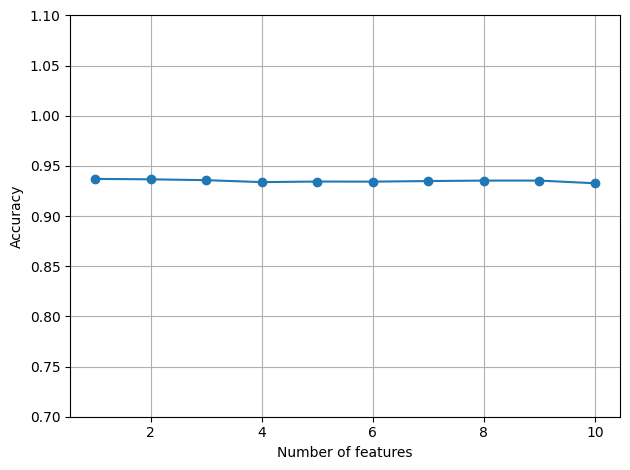

In [156]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)

# selecting features
sbs = SBS(estimator=knn, k_features=1)
sbs.fit(X_train_minmax, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [157]:
sbs.scores_

[0.9327337751130745,
 0.9354160092563374,
 0.9354160092563374,
 0.9349426738192911,
 0.9343641527295676,
 0.9344693383822447,
 0.9338908172925213,
 0.9358367518670453,
 0.9366782370884611,
 0.937098979699169]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=10000,
                                random_state=0,
                                n_jobs=-1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

在银行判断顾客是否会严重拖欠的问题中，如果高召回率是关键目标，意味着我们更关注能够捕捉到所有实际会发生严重拖欠的客户，即尽量减少漏报的情况。在这种情况下，请问在逻辑斯蒂回归、决策树、随机森林、SVM、KNN 这五个模型中选择哪一个模型最佳

在追求高召回率的情况下，我们希望最大限度地捕捉到实际发生严重拖欠的客户，即尽量减少漏报的情况。在这种场景下，以下是对于逻辑斯蒂回归、决策树、随机森林、支持向量机（SVM）、K最近邻（KNN）的一些建议：

1. **逻辑斯蒂回归：**
   - 逻辑斯蒂回归是一个简单而有效的模型，特别适合作为基线模型。它能够提供概率输出，可以通过调整阈值来平衡精确度和召回率。

2. **决策树：**
   - 决策树对于非线性关系的建模能力较强，且容易解释。通过调整决策树的参数，如树的深度等，可以影响模型的复杂度，以适应不同数据特征。

3. **随机森林：**
   - 随机森林是决策树的集成模型，能够提高模型的鲁棒性和准确性。通过合理设置参数，随机森林可以在保持较高召回率的同时控制过拟合。

4. **支持向量机（SVM）：**
   - SVM在处理高维数据和非线性问题时表现出色。通过选择合适的核函数和调整参数，可以获得较高的召回率。但在大规模数据集上的计算开销可能较大。

5. **K最近邻（KNN）：**
   - KNN是一种基于实例的学习方法，对于拥有局部结构的问题可能效果较好。通过选择合适的邻居数量（K值），可以调整模型的灵敏度。

最终选择最佳模型取决于具体的数据特征和业务需求。建议使用交叉验证等方法，在实际数据集上评估这些模型的性能，然后选择性能最优的模型。同时，可以通过调整模型的阈值等参数来进一步优化召回率。